# This is the Notebook for the project with the 'Sports Bar' chain expansion

## First is Data Acquisition section 

### Libraries that will need for this Notebook

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

import wget

print('Libraries imported.')


Libraries imported.


### Data for New York Boroughs and Neighborhoods

In [34]:
wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json')
print('Data downloaded!')

100% [............................................................................] 115774 / 115774Data downloaded!


In [35]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [36]:
neighborhoods_data = newyork_data['features']

### Transform the Data to a Pandas DataFrame

In [37]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [38]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [39]:
neighborhoods.shape

(306, 4)

In [40]:
neighborhoods.groupby('Borough').count()

Neighborhood  Latitude  Longitude
Borough                                         
Bronx                    52        52         52
Brooklyn                 70        70         70
Manhattan                40        40         40
Queens                   81        81         81
Staten Island            63        63         63

### In the data there is also Staten Island that we don't care 

In [41]:
Area_df=neighborhoods[(neighborhoods['Borough']=='Manhattan') | (neighborhoods['Borough']=='Brooklyn') | (neighborhoods['Borough']=='Queens') | (neighborhoods['Borough']=='Bronx')]

In [42]:
Area_df.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [43]:
Area_df.shape

(243, 4)

In [44]:
Area_df.groupby('Borough').count()

Neighborhood  Latitude  Longitude
Borough                                     
Bronx                52        52         52
Brooklyn             70        70         70
Manhattan            40        40         40
Queens               81        81         81

Now we want Manhatttan with Brox in one DataFrame and Brooklyn with Queen in another

In [45]:
Manhattan_Bronx_df = Area_df[(Area_df['Borough']=='Bronx')| (Area_df['Borough']=='Manhattan')].reset_index(drop=True)

In [673]:
Manhattan_Bronx_df.head(10)

Borough    Neighborhood   Latitude  Longitude
0      Bronx       Wakefield  40.894705 -73.847201
1      Bronx      Co-op City  40.874294 -73.829939
2      Bronx     Eastchester  40.887556 -73.827806
3      Bronx       Fieldston  40.895437 -73.905643
4      Bronx       Riverdale  40.890834 -73.912585
5      Bronx     Kingsbridge  40.881687 -73.902818
6  Manhattan     Marble Hill  40.876551 -73.910660
7      Bronx        Woodlawn  40.898273 -73.867315
8      Bronx         Norwood  40.877224 -73.879391
9      Bronx  Williamsbridge  40.881039 -73.857446

In [671]:
Brooklyn_df = Area_df[(Area_df['Borough']=='Brooklyn')].reset_index(drop=True)
Brooklyn_df.head(10)

Borough       Neighborhood   Latitude  Longitude
0  Brooklyn          Bay Ridge  40.625801 -74.030621
1  Brooklyn        Bensonhurst  40.611009 -73.995180
2  Brooklyn        Sunset Park  40.645103 -74.010316
3  Brooklyn         Greenpoint  40.730201 -73.954241
4  Brooklyn          Gravesend  40.595260 -73.973471
5  Brooklyn     Brighton Beach  40.576825 -73.965094
6  Brooklyn     Sheepshead Bay  40.586890 -73.943186
7  Brooklyn  Manhattan Terrace  40.614433 -73.957438
8  Brooklyn           Flatbush  40.636326 -73.958401
9  Brooklyn      Crown Heights  40.670829 -73.943291

In [672]:
Queens_df=Area_df[Area_df['Borough']=='Queens'].reset_index(drop=True)
Queens_df.head(10)

Borough     Neighborhood   Latitude  Longitude
0  Queens          Astoria  40.768509 -73.915654
1  Queens         Woodside  40.746349 -73.901842
2  Queens  Jackson Heights  40.751981 -73.882821
3  Queens         Elmhurst  40.744049 -73.881656
4  Queens     Howard Beach  40.654225 -73.838138
5  Queens           Corona  40.742382 -73.856825
6  Queens     Forest Hills  40.725264 -73.844475
7  Queens      Kew Gardens  40.705179 -73.829819
8  Queens    Richmond Hill  40.697947 -73.831833
9  Queens         Flushing  40.764454 -73.831773

## Now that we have the first Datasets clean is good to visualize some characteristics

In [49]:
address = 'Manhattan'
#address = 'Langstrasse'
#address = 'Paralimni'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_manh = location.latitude
longitude_manh = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude_manh, longitude_manh))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [50]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude_manh, longitude_manh], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(Manhattan_Bronx_df['Latitude'], Manhattan_Bronx_df['Longitude'], Manhattan_Bronx_df['Borough'], Manhattan_Bronx_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#FF4500',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
for lat, lng, borough, neighborhood in zip(Brooklyn_df['Latitude'], Brooklyn_df['Longitude'], Brooklyn_df['Borough'], Brooklyn_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='#C0C0C0',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  

for lat, lng, borough, neighborhood in zip(Queens_df['Latitude'], Queens_df['Longitude'], Queens_df['Borough'], Queens_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)    
    
map_newyork

### The orange markers are the Neighborhoods around Manhattan and Bronx where we want to find a location for the first Bar. They grey are the Neighborhoods in Brooklyn where we want the second Bar and the blue are the Neighborhoods in Queens where the "Sports Bar" chain have their Bar

In [51]:
Manhattan_Bronx_df.groupby('Borough').count()

Neighborhood  Latitude  Longitude
Borough                                     
Bronx                52        52         52
Manhattan            40        40         40

## Let's now use Foursquare to find venues in these neighborhoods

In [11]:
CLIENT_ID = 'S0FKAQ0NPT4Z2U1N1YPVM5G44JPXEEE0YW0UAGG1V4OLEQAG' # your Foursquare ID
CLIENT_SECRET = '2PUMOVNQEGXBADFAX0YBNZT1BRPLHR0MSXDQ2N0YQSKEWAIB' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S0FKAQ0NPT4Z2U1N1YPVM5G44JPXEEE0YW0UAGG1V4OLEQAG
CLIENT_SECRET:2PUMOVNQEGXBADFAX0YBNZT1BRPLHR0MSXDQ2N0YQSKEWAIB


### Search for a bar venues 

In [53]:
search_query = 'Bar'
radius = 900

In [178]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_manh, longitude_manh, VERSION, search_query, radius, LIMIT)

In [55]:
import requests

In [180]:
# results = requests.get(url).json()
# results

In [57]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-57-5acf500bf9ad>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


id                         name  \
0  5f039385249fbb047d2e5868          Natan Bar-Chama, MD   
1  5b672be3054e290039752f72               Eli's Wine Bar   
2  58a5d1d426a95370d3355e0d               WFM Coffee Bar   
3  5eab58fdae6b090008ea22da  Trattoria iL Gusto Wine Bar   
4  5e3de78569e2000008567c6e              Mojo Mousse Bar   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d177941735', 'name': 'D...  v-1605287045    False   
1  [{'id': '4bf58dd8d48988d123941735', 'name': 'W...  v-1605287045    False   
2  [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...  v-1605287045    False   
3  [{'id': '4bf58dd8d48988d110941735', 'name': 'I...  v-1605287045    False   
4  [{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...  v-1605287045    False   

   location.address  location.lat  location.lng  \
0  5 E 98th St Fl 6     40.789129    -73.953860   
1      26 E 91st St     40.783957    -73.956841   
2  808 Columbus Ave     40.795145    -73.965855   
3  625 Columbus Ave     40.789299    -73.969776   
4    177 E 100th St     40.788380    -73.948710   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 40.78912884651564...                511   
1  [{'label': 'display', 'lat': 40.783957, 'lng':...                681   
2  [{'label': 'display', 'lat': 40.795145, 'lng':...                793   
3  [{'label': 'display', 'lat': 40.7892987, 'lng'...                833   
4  [{'label': 'display', 'lat': 40.78838, 'lng': ...                952   

  location.postalCode location.cc location.city location.state  \
0               10029          US      New York             NY   
1               10128          US      New York             NY   
2               10025          US      New York             NY   
3               10024          US      New York             NY   
4               10029          US      New York             NY   

  location.country                          location.formattedAddress  \
0    United States  [5 E 98th St Fl 6, New York, NY 10029, United ...   
1    United States  [26 E 91st St, New York, NY 10128, United States]   
2    United States  [808 Columbus Ave, New York, NY 10025, United ...   
3    United States  [625 Columbus Ave, New York, NY 10024, United ...   
4    United States  [177 E 100th St (Lexington), New York, NY 1002...   

  delivery.id                                       delivery.url  \
0         NaN                                                NaN   
1         NaN                                                NaN   
2         NaN                                                NaN   
3      345238  https://www.seamless.com/menu/trattoria-il-gus...   
4         NaN                                                NaN   

  delivery.provider.name             delivery.provider.icon.prefix  \
0                    NaN                                       NaN   
1                    NaN                                       NaN   
2                    NaN                                       NaN   
3               seamless  https://fastly.4sqi.net/img/general/cap/   
4                    NaN                                       NaN   

  delivery.provider.icon.sizes               delivery.provider.icon.name  \
0                          NaN                                       NaN   
1                          NaN                                       NaN   
2                          NaN                                       NaN   
3                     [40, 50]  /delivery_provider_seamless_20180129.png   
4                          NaN                                       NaN   

  location.crossStreet location.neighborhood venuePage.id  
0                  NaN                   NaN          NaN  
1                  NaN                   NaN          NaN  
2                  NaN                   NaN          NaN  
3                  NaN                   NaN          NaN  
4       

In [670]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

Neighborhood                      Venue      Venue Category  Venue Latitude  \
0    Wakefield  Allure Restaurant And Bar          Restaurant       40.890785   
1    Wakefield          Famous Barbershop  Miscellaneous Shop       40.895085   
2    Wakefield         Barnes Ave Grocery       Grocery Store       40.892181   
3    Wakefield      MidKNIGHTs Barbershop  Salon / Barbershop       40.891554   
4    Wakefield  King of kings barber shop  Salon / Barbershop       40.891053   

   Venue Longitude  
0       -73.849970  
1       -73.845625  
2       -73.854427  
3       -73.844385  
4       -73.849326

### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [12]:
def getNearbyBars(name, latitudes, longitudes, radius=600):
    search_query = 'Bar'
    venues_list=[]
    for name, lat, lng in zip(name, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, LIMIT)
        import requests
        # make the GET request     
        results = requests.get(url).json()

        # assign relevant part of JSON to venues
        venues = results['response']['venues']

#         # tranform venues into a dataframe
#         dataframe[i] = (json_normalize(v) for v in venues)  
#         print(dataframe)
      
     
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat, 
            lng, 
            v['name'],
            v['location']['lat'], 
            v['location']['lng'], #for v in venues]) 
            v['categories'][0]) for v in venues])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)

In [668]:
Manhattan_Bronx_df.head(10)

Borough    Neighborhood   Latitude  Longitude
0      Bronx       Wakefield  40.894705 -73.847201
1      Bronx      Co-op City  40.874294 -73.829939
2      Bronx     Eastchester  40.887556 -73.827806
3      Bronx       Fieldston  40.895437 -73.905643
4      Bronx       Riverdale  40.890834 -73.912585
5      Bronx     Kingsbridge  40.881687 -73.902818
6  Manhattan     Marble Hill  40.876551 -73.910660
7      Bronx        Woodlawn  40.898273 -73.867315
8      Bronx         Norwood  40.877224 -73.879391
9      Bronx  Williamsbridge  40.881039 -73.857446

In [13]:
import requests
manhattan_bronx_bars = getNearbyBars(name=Manhattan_Bronx_df['Neighborhood'],
                                   latitudes=Manhattan_Bronx_df['Latitude'],
                                   longitudes=Manhattan_Bronx_df['Longitude'])

manhattan_bronx_bars.head()

NameError: name 'Manhattan_Bronx_df' is not defined

#### Here I saved the above csv in order I want to use it again, to avoid request from foursquare again

In [2]:
#manhattan_bronx_bars.to_csv('manhattan_bars_true.csv',index=False)
manhattan_bronx_bars=pd.read_csv(r'C:\Users\dee\Documents\Python\Data Science Labs\Capstone Project\manhattan_bars_true.csv')
manhattan_bronx_bars.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                       Venue  Venue Latitude  Venue Longitude  \
0  Allure Restaurant And Bar       40.890785       -73.849970   
1          Famous Barbershop       40.895085       -73.845625   
2         Barnes Ave Grocery       40.892181       -73.854427   
3      MidKNIGHTs Barbershop       40.891554       -73.844385   
4  King of kings barber shop       40.891053       -73.849326   

                                      Venue Category  
0  [{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...  
1  [{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...  
2  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...  
3  [{'id': '4bf58dd8d48988d110951735', 'name': 'S...  
4  [{'id': '4bf58dd8d48988d110951735', 'name': 'S...

### And here we make the same request to get the venus of Brooklyn

In [667]:
import requests
brooklyn_bars = getNearbyBars(name=Brooklyn_df['Neighborhood'],
                                   latitudes=Brooklyn_df['Latitude'],
                                   longitudes=Brooklyn_df['Longitude'])  

brooklyn_bars.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Bay Ridge              40.625801              -74.030621   
1    Bay Ridge              40.625801              -74.030621   
2    Bay Ridge              40.625801              -74.030621   
3    Bay Ridge              40.625801              -74.030621   
4    Bay Ridge              40.625801              -74.030621   

                                      Venue  Venue Latitude  Venue Longitude  \
0  RED OAK Restaurant & Bar & Hookah Lounge       40.625447       -74.030246   
1                        Cebu' Bar & Bistro       40.621812       -74.031727   
2        Zitelli's Thin Crust Pizza and Bar       40.623555       -74.030969   
3                         Harp Bar Brooklyn       40.629789       -74.028533   
4               Fillie's Restaurant and Bar       40.625156       -74.030661   

                                      Venue Category  
0  [{'id': '4bf58dd8d48988d119941735', 'name': 'H...  
1  [{'id': '4bf58dd8d48988d157941735', 'name': 'N...  
2  [{'id': '4bf58dd8d48988d110941735', 'name': 'I...  
3  [{'id': '4bf58dd8d48988d116941735', 'name': 'B...  
4  [{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...

In [118]:
#brooklyn_bars.to_csv('brooklyn_bars_true.csv',index=False)
brooklyn_bars=pd.read_csv(r'C:\Users\dee\Documents\Python\Data Science Labs\Capstone Project\brooklyn_bars_true.csv')

# We got the Datasets with the bars for Manhattan-Bronx and for Brookly
# Now we will start the analysis of Manhattan-Bronx 

## Now we have to fix the 'Venue Category' of the above dataframes

In [3]:
filtered_columns = ['Neighborhood', 'Venue','Venue Category','Venue Latitude','Venue Longitude'] # + [col for col in manhattan_bronx_bars.columns if col.startswith('location.')] + ['id']
dataframe_filtered = manhattan_bronx_bars.loc[:, filtered_columns]
dataframe_filtered.head()

Neighborhood                      Venue  \
0    Wakefield  Allure Restaurant And Bar   
1    Wakefield          Famous Barbershop   
2    Wakefield         Barnes Ave Grocery   
3    Wakefield      MidKNIGHTs Barbershop   
4    Wakefield  King of kings barber shop   

                                      Venue Category  Venue Latitude  \
0  [{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...       40.890785   
1  [{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...       40.895085   
2  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...       40.892181   
3  [{'id': '4bf58dd8d48988d110951735', 'name': 'S...       40.891554   
4  [{'id': '4bf58dd8d48988d110951735', 'name': 'S...       40.891053   

   Venue Longitude  
0       -73.849970  
1       -73.845625  
2       -73.854427  
3       -73.844385  
4       -73.849326

In [7]:
filtered_columns = ['Neighborhood', 'Venue','Venue Category','Venue Latitude','Venue Longitude'] # + [col for col in manhattan_bronx_bars.columns if col.startswith('location.')] + ['id']
dataframe_filtered = manhattan_bronx_bars.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['Venue Category']
    except:
        categories_list = row['venue.plural name']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['Venue Category'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

manhattan_bars_filtered=dataframe_filtered
manhattan_bars_filtered.head()

In [674]:
cc=manhattan_bars_filtered.groupby('Venue Category').count()
cc.sort_values(by='Neighborhood',ascending=False).head()

Neighborhood  Venue  Venue Latitude  Venue Longitude
Venue Category                                                          
Salon / Barbershop           674    674             674              674
Bar                          338    338             338              338
Juice Bar                     91     91              91               91
Cocktail Bar                  74     74              74               74
Wine Bar                      66     66              66               66

### We put for search query the word 'Bar' and in the results we have venues that the word Bar is a part of the venue category or there is the string 'bar' in the name of the venue (Barbershop, Bartow pizza)

### Now we will filter the dataframe to take only venues that the word bar is only in the category

In [121]:
Manh_Bronx_Bar_Final=pd.DataFrame(manhattan_bars_filtered[(manhattan_bars_filtered['Venue Category']=='Bar') |(manhattan_bars_filtered['Venue Category']=='Cocktail Bar') | (manhattan_bars_filtered['Venue Category']=='Juice Bar') |(manhattan_bars_filtered['Venue Category']=='Wine Bar') |(manhattan_bars_filtered['Venue Category']=='Hotel Bar') |(manhattan_bars_filtered['Venue Category']=='Lounge') |(manhattan_bars_filtered['Venue Category']=='Dive Bar') |(manhattan_bars_filtered['Venue Category']=='Pub') |(manhattan_bars_filtered['Venue Category']=='Sports Bar') |(manhattan_bars_filtered['Venue Category']=='Gay Bar') |(manhattan_bars_filtered['Venue Category']=='Karaoke Bar') | (manhattan_bars_filtered['Venue Category']=='Gastropub') |(manhattan_bars_filtered['Venue Category']=='Hookah Bar') |(manhattan_bars_filtered['Venue Category']=='Sake Bar') |(manhattan_bars_filtered['Venue Category']=='Beer Bar') |(manhattan_bars_filtered['Venue Category']=='Beer Garden') |(manhattan_bars_filtered['Venue Category']=='Whiskey Bar') ]).reset_index(drop=True)

In [675]:
Manh_Bronx_Bar_Final.head(15)

Neighborhood                        Venue Venue Category  Venue Latitude  \
0    Co-op City                    Juice Bar      Juice Bar       40.876156   
1    Co-op City              The City Lounge            Bar       40.876755   
2   Eastchester          Gardens Bar & Grill            Bar       40.892959   
3     Riverdale       Blackstone Bar & Grill            Bar       40.887253   
4     Riverdale        Fenwick's Bar & Grill            Bar       40.887170   
5   Kingsbridge          100% Juice Bar Cafe      Juice Bar       40.883705   
6   Kingsbridge  Madden's Uptown Bar & Grill            Pub       40.883327   
7   Kingsbridge                  Harpurs Bar            Bar       40.878500   
8   Kingsbridge                Trifffffe Bar            Bar       40.878915   
9   Kingsbridge       Blackstone Bar & Grill            Bar       40.887253   
10  Kingsbridge              Rowes Wharf Bar            Bar       40.883200   
11  Kingsbridge                     JC Mac's            Bar       40.884605   
12  Marble Hill     shooter's bar and grille            Pub       40.878581   
13  Marble Hill                Trifffffe Bar            Bar       40.878915   
14     Woodlawn              Lark's Nest Bar            Bar       40.897960   

    Venue Longitude          Borough  
0        -73.829506  Manhattan/Bronx  
1        -73.833405  Manhattan/Bronx  
2        -73.831187  Manhattan/Bronx  
3        -73.907251  Manhattan/Bronx  
4        -73.904526  Manhattan/Bronx  
5        -73.897896  Manhattan/Bronx  
6        -73.901777  Manhattan/Bronx  
7        -73.903331  Manhattan/Bronx  
8        -73.906074  Manhattan/Bronx  
9        -73.907251  Manhattan/Bronx  
10       -73.910000  Manhattan/Bronx  
11       -73.899895  Manhattan/Bronx  
12       -73.914491  Manhattan/Bronx  
13       -73.906074  Manhattan/Bronx  
14       -73.866995  Manhattan/Bronx

In [123]:
Manh_Bronx_Bar_Final.columns

Index(['Neighborhood', 'Venue', 'Venue Category', 'Venue Latitude',
       'Venue Longitude'],
      dtype='object')

## We can see in the next map all venues with the category bar in Manhattan and Bronx

In [124]:
# create map of New York using latitude and longitude values
map_venues_manhattan_bronx = folium.Map(location=[latitude_manh, longitude_manh], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(Manh_Bronx_Bar_Final['Venue Latitude'], Manh_Bronx_Bar_Final['Venue Longitude'], Manh_Bronx_Bar_Final['Neighborhood']):
    label = '{}'.format(neighborhood) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues_manhattan_bronx)
    
    
map_venues_manhattan_bronx

In [676]:
Manh_Bronx_SportsBar=dataframe_filtered[(dataframe_filtered['Venue Category']=='Sports Bar')].reset_index(drop=True)
Manh_Bronx_SportsBar.head(10)

Neighborhood                     Venue Venue Category  Venue Latitude  \
0     Throgs Neck        Bridges Sports Bar     Sports Bar       40.818949   
1     Parkchester         Archer Sports Bar     Sports Bar       40.838048   
2        Van Nest         Archer Sports Bar     Sports Bar       40.838048   
3      Pelham Bay              Bases Loaded     Sports Bar       40.847233   
4  Edgewater Park        Bridges Sports Bar     Sports Bar       40.818949   
5       Olinville     Los Primos Sports Bar     Sports Bar       40.865275   
6          Inwood            Rio Sports Bar     Sports Bar       40.866962   
7     East Harlem         Picabo Sports Bar     Sports Bar       40.792912   
8       Yorkville      East End Bar & Grill     Sports Bar       40.777405   
9       Yorkville  Mel's Glitter Sports Bar     Sports Bar       40.770760   

   Venue Longitude  
0       -73.817367  
1       -73.863917  
2       -73.863917  
3       -73.832290  
4       -73.817367  
5       -73.867496  
6       -73.922218  
7       -73.945496  
8       -73.948935  
9       -73.951886

## Now lets split the Sports Bar from the rest of the bars

In [126]:
# create map of New York using latitude and longitude values
map_venues_manhattan_bronx = folium.Map(location=[latitude_manh, longitude_manh], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(Manh_Bronx_Bar_Final['Venue Latitude'], Manh_Bronx_Bar_Final['Venue Longitude'], Manh_Bronx_Bar_Final['Neighborhood']):
    label = '{}'.format(neighborhood) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.3,
        parse_html=False).add_to(map_venues_manhattan_bronx)

for lat, lng, neighborhood in zip(Manh_Bronx_SportsBar['Venue Latitude'], Manh_Bronx_SportsBar['Venue Longitude'], Manh_Bronx_SportsBar['Neighborhood']):
    label = '{}'.format(neighborhood) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues_manhattan_bronx)   
    
map_venues_manhattan_bronx

## We can see in the above map with orange color are venues with the category bar and with red are the Sports Bars

### We have to get data for the Neighborhoods in Queens in order to compare them with Neighborhoods in Manhattan-Bronx

In [195]:
Queens_df.head()

Borough     Neighborhood   Latitude  Longitude
0  Queens          Astoria  40.768509 -73.915654
1  Queens         Woodside  40.746349 -73.901842
2  Queens  Jackson Heights  40.751981 -73.882821
3  Queens         Elmhurst  40.744049 -73.881656
4  Queens     Howard Beach  40.654225 -73.838138

In [677]:
import requests
Queens_bars = getNearbyBars(name=Queens_df['Neighborhood'],
                                   latitudes=Queens_df['Latitude'],
                                   longitudes=Queens_df['Longitude'])  

Queens_bars.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Astoria              40.768509              -73.915654   
1      Astoria              40.768509              -73.915654   
2      Astoria              40.768509              -73.915654   
3      Astoria              40.768509              -73.915654   
4      Astoria              40.768509              -73.915654   

                           Venue  Venue Latitude  Venue Longitude  \
0  McCaffrey & Burke Bar & Grill       40.767197       -73.921243   
1              Heaven Sports Bar       40.764464       -73.915226   
2                    Butcher Bar       40.764437       -73.916278   
3           Ovelia Psistaria Bar       40.765779       -73.918890   
4                        SVL Bar       40.772078       -73.927207   

                                      Venue Category  
0  [{'id': '4bf58dd8d48988d118941735', 'name': 'D...  
1  [{'id': '4bf58dd8d48988d11d941735', 'name': 'S...  
2  [{'id': '4bf58dd8d48988d1df931735', 'name': 'B...  
3  [{'id': '4bf58dd8d48988d10e941735', 'name': 'G...  
4  [{'id': '4bf58dd8d48988d10e941735', 'name': 'G...

In [196]:
#Queens_bars.to_csv('queens_bars_true.csv',index=False)
Queens_bars=pd.read_csv(r'C:\Users\dee\Documents\Python\Data Science Labs\Capstone Project\queens_bars_true.csv')

In [443]:
filtered_columns = ['Neighborhood', 'Venue','Venue Category','Venue Latitude','Venue Longitude'] # + [col for col in manhattan_bronx_bars.columns if col.startswith('location.')] + ['id']
queens_filtered = Queens_bars.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['Venue Category']
    except:
        categories_list = row['venue.plural name']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
queens_filtered['Venue Category'] = queens_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
queens_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

queens_filtered.head()

Neighborhood                          Venue    Venue Category  \
0      Astoria  McCaffrey & Burke Bar & Grill          Dive Bar   
1      Astoria              Heaven Sports Bar        Sports Bar   
2      Astoria                    Butcher Bar         BBQ Joint   
3      Astoria           Ovelia Psistaria Bar  Greek Restaurant   
4      Astoria                        SVL Bar  Greek Restaurant   

   Venue Latitude  Venue Longitude  
0       40.767197       -73.921243  
1       40.764464       -73.915226  
2       40.764437       -73.916278  
3       40.765779       -73.918890  
4       40.772078       -73.927207

In [665]:
dd=queens_filtered.groupby('Venue Category').count()
dd.sort_values(by='Neighborhood',ascending=False).head(10)

Neighborhood  Venue  Venue Latitude  \
Venue Category                                                   
Salon / Barbershop                  296    296             296   
Bar                                 122    122             122   
Food                                 21     21              21   
Sports Bar                           21     21              21   
Juice Bar                            20     20              20   
American Restaurant                  17     17              17   
Lounge                               16     16              16   
Building                             15     15              15   
Health & Beauty Service              14     14              14   
Latin American Restaurant            13     13              13   

                           Venue Longitude  
Venue Category                              
Salon / Barbershop                     296  
Bar                                    122  
Food                                    21  
Sports Bar                              21  
Juice Bar                               20  
American Restaurant                     17  
Lounge                                  16  
Building                                15  
Health & Beauty Service                 14  
Latin American Restaurant               13

In [203]:
queens_bars_final=pd.DataFrame(queens_filtered[(queens_filtered['Venue Category']=='Bar') |(queens_filtered['Venue Category']=='Cocktail Bar') | (queens_filtered['Venue Category']=='Juice Bar') |(queens_filtered['Venue Category']=='Wine Bar') |(queens_filtered['Venue Category']=='Hotel Bar') |(queens_filtered['Venue Category']=='Lounge') |(queens_filtered['Venue Category']=='Dive Bar') |(queens_filtered['Venue Category']=='Pub') |(queens_filtered['Venue Category']=='Sports Bar') |(queens_filtered['Venue Category']=='Gay Bar') |(queens_filtered['Venue Category']=='Karaoke Bar') | (queens_filtered['Venue Category']=='Gastropub') |(queens_filtered['Venue Category']=='Hookah Bar') |(queens_filtered['Venue Category']=='Sake Bar') |(queens_filtered['Venue Category']=='Beer Bar') |(queens_filtered['Venue Category']=='Beer Garden') |(queens_filtered['Venue Category']=='Whiskey Bar') ]).reset_index(drop=True)
queens_bars_final.head()

Neighborhood                          Venue Venue Category  Venue Latitude  \
0      Astoria  McCaffrey & Burke Bar & Grill       Dive Bar       40.767197   
1      Astoria              Heaven Sports Bar     Sports Bar       40.764464   
2      Astoria                  Albatross Bar            Bar       40.770049   
3      Astoria                Ibiza Juice Bar      Juice Bar       40.766450   
4      Astoria          The Bar At Grand Cafe            Bar       40.764665   

   Venue Longitude  
0       -73.921243  
1       -73.915226  
2       -73.912244  
3       -73.920477  
4       -73.916328

In [662]:
#queens_bars_final.groupby('Neighborhood').count()

## Create map of Queens venues with the category bar

In [208]:
# create map of Queens using latitude and longitude values
map_venues_queens = folium.Map(location=[latitude_manh, longitude_manh], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(queens_bars_final['Venue Latitude'], queens_bars_final['Venue Longitude'],queens_bars_final['Neighborhood']):
    label = '{}'.format(neighborhood) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='grey',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues_queens)
    
    
map_venues_queens

Now we have the data for Queens as well

## Now we have to compare/CLUSTER the neighborhoods of Manhattan-Bronx with Queens
## We have already a bar in Queens which is succesfull so we want the first bar in Manhattan-Bronx to be in a similar neighborhood

In [447]:
Manh_Bronx_Bar_Final['Borough']='Manhattan/Bronx'
queens_bars_final['Borough']='Queens'

In [448]:
Manh_Queens_concat=pd.concat([Manh_Bronx_Bar_Final, queens_bars_final], ignore_index=True)
Manh_Queens_concat.head()

Neighborhood                   Venue Venue Category  Venue Latitude  \
0   Co-op City               Juice Bar      Juice Bar       40.876156   
1   Co-op City         The City Lounge            Bar       40.876755   
2  Eastchester     Gardens Bar & Grill            Bar       40.892959   
3    Riverdale  Blackstone Bar & Grill            Bar       40.887253   
4    Riverdale   Fenwick's Bar & Grill            Bar       40.887170   

   Venue Longitude          Borough  
0       -73.829506  Manhattan/Bronx  
1       -73.833405  Manhattan/Bronx  
2       -73.831187  Manhattan/Bronx  
3       -73.907251  Manhattan/Bronx  
4       -73.904526  Manhattan/Bronx

### Get dummies for the categories of the venue to better analyze the neighbourhoods

In [449]:
# one hot encoding
Manh_Queens_concat_onehot = pd.get_dummies(Manh_Queens_concat[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Manh_Queens_concat_onehot['Neighborhood'] = Manh_Queens_concat['Neighborhood'] 

# move neighborhood column to the first column
cols = list(Manh_Queens_concat_onehot.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Neighborhood')) #Remove columns from list
Manh_Queens_concat_onehot = Manh_Queens_concat_onehot[['Neighborhood']+cols] #Create new dataframe with columns in the order you want
Manh_Queens_concat_onehot.head()

pd.set_option('display.max_columns', 225)
Manh_Queens_concat_onehot.head()

Neighborhood  Bar  Beer Bar  Beer Garden  Cocktail Bar  Dive Bar  Gastropub  \
0   Co-op City    0         0            0             0         0          0   
1   Co-op City    1         0            0             0         0          0   
2  Eastchester    1         0            0             0         0          0   
3    Riverdale    1         0            0             0         0          0   
4    Riverdale    1         0            0             0         0          0   

   Gay Bar  Hookah Bar  Hotel Bar  Juice Bar  Karaoke Bar  Lounge  Pub  \
0        0           0          0          1            0       0    0   
1        0           0          0          0            0       0    0   
2        0           0          0          0            0       0    0   
3        0           0          0          0            0       0    0   
4        0           0          0          0            0       0    0   

   Sake Bar  Sports Bar  Wine Bar  
0         0           0         0  
1         0           0         0  
2         0           0         0  
3         0           0         0  
4         0           0         0

In [450]:
Manh_Queens_concat_onehot.shape

(1053, 17)

In [451]:
Manh_Queens_concat_grouped= Manh_Queens_concat_onehot.groupby('Neighborhood').mean().reset_index()
Manh_Queens_concat_grouped.head(15)

Neighborhood       Bar  Beer Bar  Beer Garden  Cocktail Bar  \
0            Allerton  0.000000       0.0          0.0      0.500000   
1             Astoria  0.411765       0.0          0.0      0.000000   
2     Astoria Heights  0.000000       0.0          0.0      0.000000   
3          Auburndale  1.000000       0.0          0.0      0.000000   
4   Battery Park City  0.375000       0.0          0.0      0.083333   
5             Bayside  0.666667       0.0          0.0      0.000000   
6        Bedford Park  1.000000       0.0          0.0      0.000000   
7            Bellaire  0.500000       0.0          0.0      0.000000   
8        Belle Harbor  1.000000       0.0          0.0      0.000000   
9             Belmont  0.400000       0.0          0.0      0.000000   
10          Briarwood  0.500000       0.0          0.0      0.000000   
11      Broad Channel  0.500000       0.0          0.0      0.000000   
12          Bronxdale  0.500000       0.0          0.0      0.000000   
13         Brookville  0.000000       0.0          0.0      0.000000   
14    Cambria Heights  0.000000       0.0          0.0      0.000000   

    Dive Bar  Gastropub  Gay Bar  Hookah Bar  Hotel Bar  Juice Bar  \
0   0.000000   0.000000      0.0    0.000000   0.000000   0.000000   
1   0.117647   0.000000      0.0    0.117647   0.000000   0.117647   
2   0.000000   0.000000      0.0    0.000000   1.000000   0.000000   
3   0.000000   0.000000      0.0    0.000000   0.000000   0.000000   
4   0.000000   0.041667      0.0    0.000000   0.083333   0.250000   
5   0.000000   0.000000      0.0    0.333333   0.000000   0.000000   
6   0.000000   0.000000      0.0    0.000000   0.000000   0.000000   
7   0.000000   0.000000      0.0    0.000000   0.000000   0.000000   
8   0.000000   0.000000      0.0    0.000000   0.000000   0.000000   
9   0.200000   0.000000      0.0    0.000000   0.000000   0.200000   
10  0.000000   0.000000      0.0    0.000000   0.000000   0.000000   
11  0.500000   0.000000      0.0    0.000000   0.000000   0.000000   
12  0.000000   0.000000      0.0    0.000000   0.000000   0.500000   
13  1.000000   0.000000      0.0    0.000000   0.000000   0.000000   
14  0.000000   0.000000      0.0    0.000000   0.000000   1.000000   

    Karaoke Bar    Lounge       Pub  Sake Bar  Sports Bar  Wine Bar  
0           0.0  0.000000  0.000000       0.0    0.500000  0.000000  
1           0.0  0.058824  0.058824       0.0    0.117647  0.000000  
2           0.0  0.000000  0.000000       0.0    0.000000  0.000000  
3           0.0  0.000000  0.000000       0.0    0.000000  0.000000  
4           0.0  0.041667  0.041667       0.0    0.041667  0.041667  
5           0.0  0.000000  0.000000       0.0    0.000000  0.000000  
6           0.0  0.000000  0.000000       0.0    0.000000  0.000000  
7           0.0  0.000000  0.000000       0.0    0.500000  0.000000  
8           0.0  0.000000  0.000000       0.0    0.000000  0.000000  
9           0.0  0.000000  0.200000       0.0    0.000000  0.000000  
10          0.0  0.500000  0.000000       0.0    0.000000  0.000000  
11          0.0  0.000000  0.000000       0.0    0.000000  0.000000  
12          0.0  0.000000  0.000000       0.0    0.000000  0.000000  
13          0.0  0.000000  0.000000       0.0    0.000000  0.000000  
14          0.0  0.000000  0.000000       0.0    0.000000  0.000000

# Clustering the Neighborhoods

In [452]:
from sklearn.cluster import KMeans

In [453]:
# set number of clusters
kclusters = 5

Manh_Queens_clustering = Manh_Queens_concat_grouped.drop('Neighborhood', 1) #axis nomizw to 1
Manh_Queens_clustering
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0)
kmeans.fit(Manh_Queens_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:137] 

array([3, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 3, 3, 2, 2, 2, 1, 0, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 4, 2, 1, 1, 2, 2, 4, 2, 2, 4, 1, 4, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 4, 2, 2, 4, 3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 4, 1, 2, 4, 1, 2, 2, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1,
       2, 1, 2, 1, 2])

In [454]:
Manh_Queens_concat_grouped.shape

(137, 17)

In [455]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [456]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
manh_queens_sorted = pd.DataFrame(columns=columns)
manh_queens_sorted['Neighborhood'] = Manh_Queens_concat_grouped['Neighborhood']

for ind in np.arange(Manh_Queens_concat_grouped.shape[0]):
    manh_queens_sorted.iloc[ind, 1:] = return_most_common_venues(Manh_Queens_concat_grouped.iloc[ind, :], num_top_venues)

manh_queens_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           Allerton            Sports Bar          Cocktail Bar   
1            Astoria                   Bar            Sports Bar   
2    Astoria Heights             Hotel Bar              Wine Bar   
3         Auburndale                   Bar              Wine Bar   
4  Battery Park City                   Bar             Juice Bar   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0              Wine Bar              Sake Bar                   Pub   
1             Juice Bar            Hookah Bar              Dive Bar   
2            Sports Bar              Sake Bar                   Pub   
3            Sports Bar              Sake Bar                   Pub   
4             Hotel Bar          Cocktail Bar              Wine Bar   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                Lounge           Karaoke Bar             Juice Bar   
1                   Pub                Lounge              Wine Bar   
2                Lounge           Karaoke Bar             Juice Bar   
3                Lounge           Karaoke Bar             Juice Bar   
4            Sports Bar                   Pub                Lounge   

  9th Most Common Venue 10th Most Common Venue  
0             Hotel Bar             Hookah Bar  
1              Sake Bar            Karaoke Bar  
2            Hookah Bar                Gay Bar  
3             Hotel Bar             Hookah Bar  
4             Gastropub               Sake Bar

In [457]:
manh_queens_sorted.shape

(137, 11)

In [556]:
manh_queens1 = Area_df[(Area_df['Borough']=='Bronx')| (Area_df['Borough']=='Manhattan') | (Area_df['Borough']=='Queens')].reset_index(drop=True)

In [678]:
# add clustering labels
manh_queens_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manh_queens_clust=manh_queens1


# # merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manh_queens_clust = manh_queens_clust.join(manh_queens_sorted.set_index('Neighborhood'), on='Neighborhood')

manh_queens_clust.head() # check the last columns!

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
1      Bronx   Co-op City  40.874294 -73.829939               2   
2      Bronx  Eastchester  40.887556 -73.827806               1   
4      Bronx    Riverdale  40.890834 -73.912585               1   
5      Bronx  Kingsbridge  40.881687 -73.902818               1   
6  Manhattan  Marble Hill  40.876551 -73.910660               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1             Juice Bar                   Bar              Wine Bar   
2                   Bar              Wine Bar            Sports Bar   
4                   Bar              Wine Bar            Sports Bar   
5                   Bar                   Pub             Juice Bar   
6                   Pub                   Bar              Wine Bar   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1            Sports Bar              Sake Bar                   Pub   
2              Sake Bar                   Pub                Lounge   
4              Sake Bar                   Pub                Lounge   
5              Wine Bar            Sports Bar              Sake Bar   
6            Sports Bar              Sake Bar                Lounge   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1                Lounge           Karaoke Bar             Hotel Bar   
2           Karaoke Bar             Juice Bar             Hotel Bar   
4           Karaoke Bar             Juice Bar             Hotel Bar   
5                Lounge           Karaoke Bar             Hotel Bar   
6           Karaoke Bar             Juice Bar             Hotel Bar   

  10th Most Common Venue  
1             Hookah Bar  
2             Hookah Bar  
4             Hookah Bar  
5             Hookah Bar  
6             Hookah Bar

In [563]:
manh_queens_clust.dropna(inplace=True) #default axis=0 diladi fevgei rows
manh_queens_clust['Cluster Labels']=manh_queens_clust['Cluster Labels'].astype(int)

In [713]:
manh_queens_clust.head(10)

Borough    Neighborhood   Latitude  Longitude  Cluster Labels  \
1       Bronx      Co-op City  40.874294 -73.829939               2   
2       Bronx     Eastchester  40.887556 -73.827806               1   
4       Bronx       Riverdale  40.890834 -73.912585               1   
5       Bronx     Kingsbridge  40.881687 -73.902818               1   
6   Manhattan     Marble Hill  40.876551 -73.910660               2   
7       Bronx        Woodlawn  40.898273 -73.867315               2   
8       Bronx         Norwood  40.877224 -73.879391               4   
9       Bronx  Williamsbridge  40.881039 -73.857446               2   
11      Bronx  Pelham Parkway  40.857413 -73.854756               2   
13      Bronx    Bedford Park  40.870185 -73.885512               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1              Juice Bar                   Bar              Wine Bar   
2                    Bar              Wine Bar            Sports Bar   
4                    Bar              Wine Bar            Sports Bar   
5                    Bar                   Pub             Juice Bar   
6                    Pub                   Bar              Wine Bar   
7                    Pub                   Bar              Wine Bar   
8              Juice Bar                   Bar              Wine Bar   
9               Dive Bar                   Bar              Wine Bar   
11          Cocktail Bar              Wine Bar            Sports Bar   
13                   Bar              Wine Bar            Sports Bar   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1             Sports Bar              Sake Bar                   Pub   
2               Sake Bar                   Pub                Lounge   
4               Sake Bar                   Pub                Lounge   
5               Wine Bar            Sports Bar              Sake Bar   
6             Sports Bar              Sake Bar                Lounge   
7             Sports Bar              Sake Bar                Lounge   
8             Sports Bar              Sake Bar                   Pub   
9             Sports Bar              Sake Bar                   Pub   
11              Sake Bar                   Pub                Lounge   
13              Sake Bar                   Pub                Lounge   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1                 Lounge           Karaoke Bar             Hotel Bar   
2            Karaoke Bar             Juice Bar             Hotel Bar   
4            Karaoke Bar             Juice Bar             Hotel Bar   
5                 Lounge           Karaoke Bar             Hotel Bar   
6            Karaoke Bar             Juice Bar             Hotel Bar   
7            Karaoke Bar             Juice Bar             Hotel Bar   
8                 Lounge           Karaoke Bar             Hotel Bar   
9                 Lounge           Karaoke Bar             Juice Bar   
11           Karaoke Bar             Juice Bar             Hotel Bar   
13           Karaoke Bar             Juice Bar             Hotel Bar   

   10th Most Common Venue  
1              Hookah Bar  
2              Hookah Bar  
4              Hookah Bar  
5              Hookah Bar  
6              Hookah Bar  
7              Hookah Bar  
8              Hookah Bar  
9               Hotel Bar  
11             Hookah Bar  
13             Hookah Bar

## Map with Clusters

In [566]:
map_clusters = folium.Map(location=[latitude_manh, longitude_manh], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manh_queens_clust['Latitude'], manh_queens_clust['Longitude'], manh_queens_clust['Neighborhood'], manh_queens_clust['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [567]:
manh_queens_clust.groupby('Cluster Labels').count()

Borough  Neighborhood  Latitude  Longitude  \
Cluster Labels                                               
0                     4             4         4          4   
1                    37            37        37         37   
2                    80            80        80         80   
3                     7             7         7          7   
4                    10            10        10         10   

                1st Most Common Venue  2nd Most Common Venue  \
Cluster Labels                                                 
0                                   4                      4   
1                                  37                     37   
2                                  80                     80   
3                                   7                      7   
4                                  10                     10   

                3rd Most Common Venue  4th Most Common Venue  \
Cluster Labels                                                 
0                                   4                      4   
1                                  37                     37   
2                                  80                     80   
3                                   7                      7   
4                                  10                     10   

                5th Most Common Venue  6th Most Common Venue  \
Cluster Labels                                                 
0                                   4                      4   
1                                  37                     37   
2                                  80                     80   
3                                   7                      7   
4                                  10                     10   

                7th Most Common Venue  8th Most Common Venue  \
Cluster Labels                                                 
0                                   4                      4   
1                                  37                     37   
2                                  80                     80   
3                                   7                      7   
4                                  10                     10   

                9th Most Common Venue  10th Most Common Venue  
Cluster Labels                                                 
0                                   4                       4  
1                                  37                      37  
2                                  80                      80  
3                                   7                       7  
4                                  10                      10

### The existing bar is in a neighborhood with cluster label 1 (PURPLE) (name will be hidden)
### This means that in Manhattan-Queens, the new bar will be in a neighborhood with cluster 1

# Let's visualize the neigborhoods with cluster 1 in Manhattan/Bronx (PURPLE) alongside the existing Sports Bars close (RED)

In [571]:
bars_cluster1=manh_queens_clust[((manh_queens_clust['Borough']=='Manhattan')|(manh_queens_clust['Borough']=='Bronx')) & (manh_queens_clust['Cluster Labels']==1)]

In [572]:
bars_cluster1.shape

(14, 15)

In [574]:
bars_cluster1

Borough         Neighborhood   Latitude  Longitude  Cluster Labels  \
2        Bronx          Eastchester  40.887556 -73.827806               1   
4        Bronx            Riverdale  40.890834 -73.912585               1   
5        Bronx          Kingsbridge  40.881687 -73.902818               1   
13       Bronx         Bedford Park  40.870185 -73.885512               1   
15       Bronx       Morris Heights  40.847898 -73.919672               1   
30       Bronx          Parkchester  40.837938 -73.856003               1   
31       Bronx   Westchester Square  40.840619 -73.842194               1   
36       Bronx      North Riverdale  40.908543 -73.904531               1   
38       Bronx        Schuylerville  40.826580 -73.826203               1   
44       Bronx            Unionport  40.829774 -73.850535               1   
71   Manhattan  Morningside Heights  40.808000 -73.963896               1   
153      Bronx           Mount Eden  40.843826 -73.916556               1   
159  Manhattan      Stuyvesant Town  40.731000 -73.974052               1   
168      Bronx  Kingsbridge Heights  40.870392 -73.901523               1   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
2                     Bar              Wine Bar            Sports Bar   
4                     Bar              Wine Bar            Sports Bar   
5                     Bar                   Pub             Juice Bar   
13                    Bar              Wine Bar            Sports Bar   
15                    Bar              Wine Bar            Sports Bar   
30                    Bar            Sports Bar              Wine Bar   
31                    Bar              Wine Bar            Sports Bar   
36                    Bar              Wine Bar            Sports Bar   
38                    Bar              Wine Bar            Sports Bar   
44                    Bar              Wine Bar            Sports Bar   
71                    Bar              Wine Bar                Lounge   
153                   Bar             Juice Bar              Wine Bar   
159                   Bar              Wine Bar                   Pub   
168                   Bar              Wine Bar            Sports Bar   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
2                Sake Bar                   Pub                Lounge   
4                Sake Bar                   Pub                Lounge   
5                Wine Bar            Sports Bar              Sake Bar   
13               Sake Bar                   Pub                Lounge   
15               Sake Bar                   Pub                Lounge   
30               Sake Bar                   Pub                Lounge   
31               Sake Bar                   Pub                Lounge   
36               Sake Bar                   Pub                Lounge   
38               Sake Bar                   Pub                Lounge   
44               Sake Bar                   Pub                Lounge   
71             Sports Bar              Sake Bar                   Pub   
153            Sports Bar              Sake Bar                   Pub   
159                Lounge            Hookah Bar          Cocktail Bar   
168              Sake Bar                   Pub                Lounge   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
2             Karaoke Bar             Juice Bar             Hotel Bar   
4             Karaoke Bar             Juice Bar             Hotel Bar   
5                  Lounge           Karaoke Bar             Hotel Bar   
13            Karaoke Bar             Juice Bar             Hotel Bar   
15            Karaoke Bar             Juice Bar             Hotel Bar   
30            Karaoke Bar             Juice Bar             Hotel Bar   
31            Karaoke Bar             Juice Bar             Hotel Bar   
36            Karaoke Bar             Juice Bar             Hotel Bar   
38

In [638]:
#bars_cluster1.drop(['Venue','Venue Category'])

In [579]:
new_bar = folium.Map(location=[latitude_manh, longitude_manh], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(bars_cluster1['Latitude'], bars_cluster1['Longitude'], bars_cluster1['Neighborhood']):
    label = '{}'.format(neighborhood) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='darkorchid',
        fill=True,
        fill_color='darkorchid',
        fill_opacity=0.7,
        parse_html=False).add_to(new_bar)

for lat, lng, neighborhood in zip(Manh_Bronx_SportsBar['Venue Latitude'], Manh_Bronx_SportsBar['Venue Longitude'], Manh_Bronx_SportsBar['Neighborhood']):
    label = '{}'.format(neighborhood) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(new_bar)  
    
#The location of the existing bar    
folium.CircleMarker(
        [40.745, -73.905],
        radius=12,
        color ='black',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7).add_to(new_bar)
    
new_bar

## As mentioned before, the purple marker in the above map are potential good locations

# Now we continue with the schedule of the New York Knicks

## This is to find out when to over staff the first new bar

In [461]:
schedule =pd.read_csv(r'C:\Users\dee\Documents\Python\Data Science Labs\Capstone Project\Knicks schedule.csv')

In [462]:
schedule.head()

G Date Unnamed: 2  Unnamed: 3              .1         Opponent  .2   .3  \
0  1  Wed     Oct 17        2018  Box Score  NaN    Atlanta Hawks   W  NaN   
1  2  Fri     Oct 19        2018  Box Score    @    Brooklyn Nets   L  NaN   
2  3  Sat     Oct 20        2018  Box Score  NaN   Boston Celtics   L  NaN   
3  4  Mon     Oct 22        2018  Box Score    @  Milwaukee Bucks   L  NaN   
4  5  Wed     Oct 24        2018  Box Score    @       Miami Heat   L  NaN   

      Tm    Opp    W    L Streak Notes  
0  126.0  107.0  1.0  0.0    W 1   NaN  
1  105.0  107.0  1.0  1.0    L 1   NaN  
2  101.0  103.0  1.0  2.0    L 2   NaN  
3  113.0  124.0  1.0  3.0    L 3   NaN  
4   87.0  110.0  1.0  4.0    L 4   NaN

In [463]:
schedule_knicks=schedule[['G','Date','Unnamed: 2','Unnamed: 3']]
schedule_knicks.columns

Index(['G', 'Date', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [464]:
schedule_knicks.head()

G Date Unnamed: 2  Unnamed: 3
0  1  Wed     Oct 17        2018
1  2  Fri     Oct 19        2018
2  3  Sat     Oct 20        2018
3  4  Mon     Oct 22        2018
4  5  Wed     Oct 24        2018

In [465]:
schedule_knicks.dtypes

G              int64
Date          object
Unnamed: 2    object
Unnamed: 3     int64
dtype: object

In [466]:
schedule_knicks.groupby('Date').count()

G  Unnamed: 2  Unnamed: 3
Date                            
Fri   16          16          16
Mon   12          12          12
Sat    8           8           8
Sun   15          15          15
Thu    6           6           6
Tue    9           9           9
Wed   16          16          16

In [467]:
schedule2 =pd.read_csv(r'C:\Users\dee\Documents\Python\Data Science Labs\Capstone Project\Knicks schedule2.csv')

In [657]:
schedule_knicks2=schedule2[['G','Date']]
schedule_knicks2.head()

G               Date
0  1  Wed, Oct 17, 2018
1  2  Fri, Oct 19, 2018
2  3  Sat, Oct 20, 2018
3  4  Mon, Oct 22, 2018
4  5  Wed, Oct 24, 2018

In [469]:
schedule_knicks2.dtypes

G        int64
Date    object
dtype: object

In [470]:
pd.to_datetime('Mon Nov 02 20:37:10 GMT+00:00 2015')

Timestamp('2015-11-02 20:37:10+0000', tz='UTC')

In [471]:
pd.to_datetime('Wed,Nov 17,2018', format='%a,%b %d,%Y')

Timestamp('2018-11-17 00:00:00')

In [472]:
schedule_knicks2['Date'] = pd.to_datetime(schedule_knicks2['Date'], format='%a, %b %d, %Y')

<ipython-input-472-900e09807bc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule_knicks2['Date'] = pd.to_datetime(schedule_knicks2['Date'], format='%a, %b %d, %Y')


In [474]:
schedule_knicks2['dayofweek'] = schedule_knicks2['Date'].dt.dayofweek

<ipython-input-474-06223dcf84b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule_knicks2['dayofweek'] = schedule_knicks2['Date'].dt.dayofweek


### We have the day of the week of each game but with integers with 0 to be Monday and 6 Sunday

## Convert the day of the week from integer to string

In [475]:
schedule_knicks2['dayofweek'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)

c:\users\dee\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [476]:
schedule_knicks2.rename(columns={"G": "Game", "dayofweek": "Day"},inplace=True)

c:\users\dee\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [477]:
schedule_knicks2.head(10)

Game       Date        Day
0     1 2018-10-17  Wednesday
1     2 2018-10-19     Friday
2     3 2018-10-20   Saturday
3     4 2018-10-22     Monday
4     5 2018-10-24  Wednesday
5     6 2018-10-26     Friday
6     7 2018-10-29     Monday
7     8 2018-10-31  Wednesday
8     9 2018-11-02     Friday
9    10 2018-11-04     Sunday

In [478]:
knicks_days=schedule_knicks2.groupby('Day').count()
knicks_days.reset_index()

Day  Game  Date
0     Friday    16    16
1     Monday    12    12
2   Saturday     8     8
3     Sunday    15    15
4   Thursday     6     6
5    Tuesday     9     9
6  Wednesday    16    16

In [479]:
knicks_days.head()

Game  Date
Day                  
Friday       16    16
Monday       12    12
Saturday      8     8
Sunday       15    15
Thursday      6     6
Tuesday       9     9
Wednesday    16    16

In [591]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

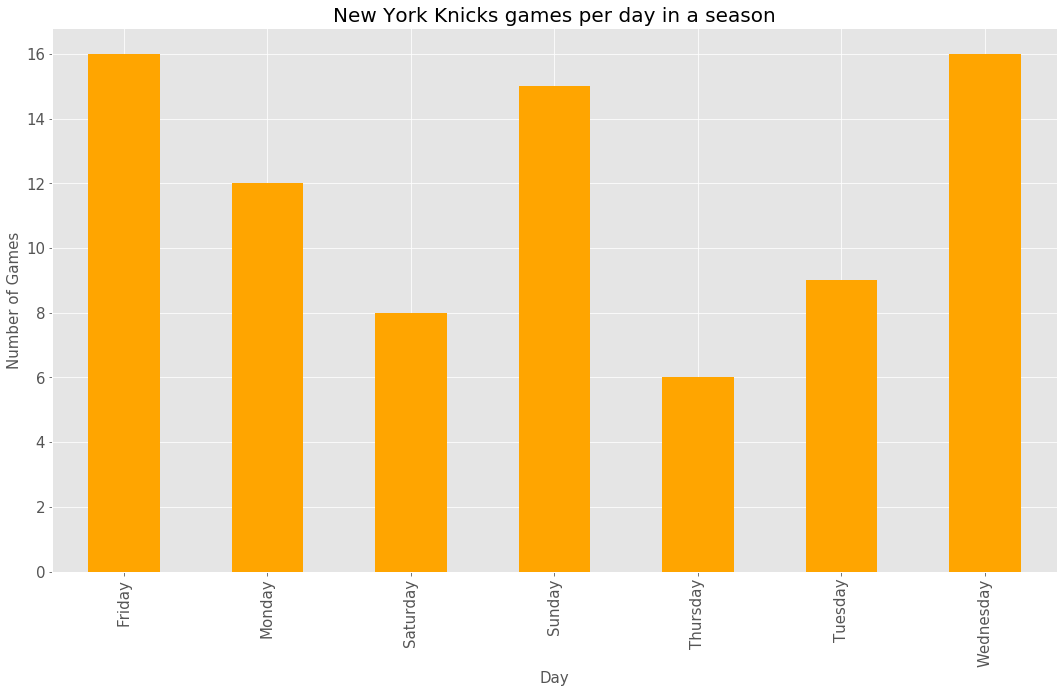

In [622]:
fig=knicks_days['Game'].plot(kind='bar',color='orange',figsize=(18,10))
plt.xlabel('Day',fontsize=15) # add to x-label to the plot
plt.ylabel('Number of Games',fontsize=15) # add y-label to the plot
plt.title('New York Knicks games per day in a season',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [593]:
yankees_schedule=pd.read_csv(r'C:\Users\dee\Documents\Python\Data Science Labs\Capstone Project\Yankees schedule.csv',encoding= 'unicode_escape')

In [594]:
yankees_schedule=pd.DataFrame(yankees_schedule[['G','Date']])
yankees_schedule.head()

G               Date
0  1   Thursday, Jul 23
1  2   Saturday, Jul 25
2  3     Sunday, Jul 26
3  4  Wednesday, Jul 29
4  5   Thursday, Jul 30

In [595]:
pd.to_datetime('Thursday, Nov 17', format='%A, %b %d').date()

datetime.date(1900, 11, 17)

In [596]:
yankees_schedule.dtypes

G        int64
Date    object
dtype: object

In [659]:
#yankees_schedule['Date'][:]

In [597]:
yankees_schedule['Date']=yankees_schedule['Date'].astype(object)

In [598]:
yankees_schedule['Date'] = pd.to_datetime(yankees_schedule['Date'], format='%A, %b %d')

In [599]:
yankees_schedule.head(10)

G       Date
0   1 1900-07-23
1   2 1900-07-25
2   3 1900-07-26
3   4 1900-07-29
4   5 1900-07-30
5   6 1900-07-31
6   7 1900-08-01
7   8 1900-08-02
8   9 1900-08-03
9  10 1900-08-05

In [600]:
yankees_schedule['Day'] = yankees_schedule['Date'].dt.dayofweek

In [601]:
yankees_schedule['Day'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)

In [602]:
yankees_schedule.head()

G       Date        Day
0  1 1900-07-23     Monday
1  2 1900-07-25  Wednesday
2  3 1900-07-26   Thursday
3  4 1900-07-29     Sunday
4  5 1900-07-30     Monday

In [603]:
yankees_final=pd.DataFrame(yankees_schedule.groupby('Day').count())
yankees_final

G  Date
Day                
Friday      5     5
Monday      7     7
Saturday    6     6
Sunday     11    11
Thursday   10    10
Tuesday    11    11
Wednesday  10    10

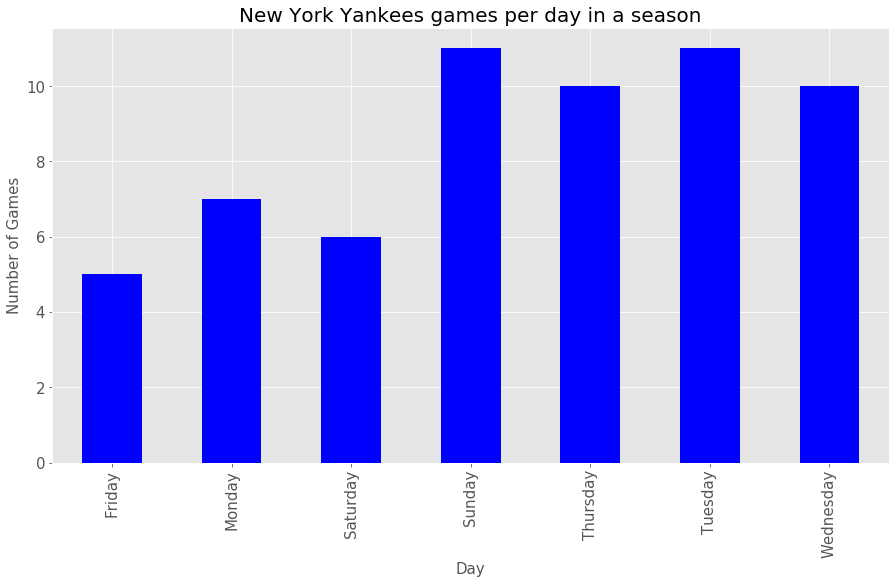

In [623]:
fig=yankees_final['G'].plot(kind='bar',color='blue',figsize=(15,8))
plt.xlabel('Day',fontsize=15) # add to x-label to the plot
plt.ylabel('Number of Games',fontsize=15) # add y-label to the plot
plt.title('New York Yankees games per day in a season',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [605]:
knicks=pd.DataFrame(knicks_days['Game']).reset_index()
knicks

Day  Game
0     Friday    16
1     Monday    12
2   Saturday     8
3     Sunday    15
4   Thursday     6
5    Tuesday     9
6  Wednesday    16

In [606]:
yankees=pd.DataFrame(yankees_final['G']).reset_index()
yankees

Day   G
0     Friday   5
1     Monday   7
2   Saturday   6
3     Sunday  11
4   Thursday  10
5    Tuesday  11
6  Wednesday  10

In [607]:
week_days=pd.DataFrame(knicks.merge(yankees, left_on='Day', right_on='Day'))
#week_days

In [608]:
week_days['Both Games']=week_days['Game']+week_days['G']
week_days

Day  Game   G  Both Games
0     Friday    16   5          21
1     Monday    12   7          19
2   Saturday     8   6          14
3     Sunday    15  11          26
4   Thursday     6  10          16
5    Tuesday     9  11          20
6  Wednesday    16  10          26

In [609]:
week_days.set_index('Day',inplace=True)

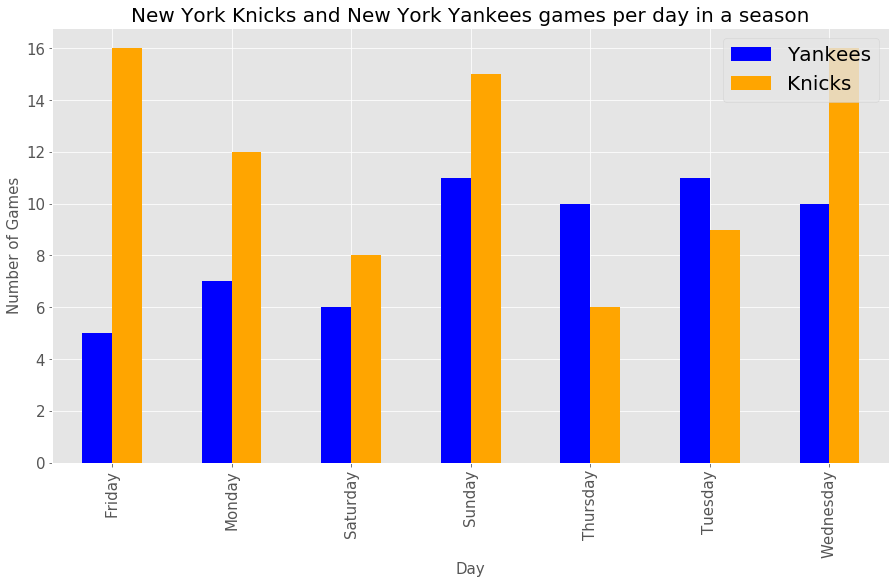

In [625]:
fig=week_days.plot(y=['G','Game'],kind='bar',color=['blue','orange'],figsize=(15,8))
plt.xlabel('Day',fontsize=15) # add to x-label to the plot
plt.ylabel('Number of Games',fontsize=15) # add y-label to the plot
plt.title('New York Knicks and New York Yankees games per day in a season',fontsize=20)
plt.legend(['Yankees','Knicks'],fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

## From the above plot we can say that except the expected days Saturday and Sunday, we expect New York Knicks fans on Wednesday and Friday so is good to have some extra staff these days (less day offs these days). Also maybe Thursdays are not busy

### We got the day of the year, now let's take the month of the year

In [632]:
yankees_schedule['Month'] = yankees_schedule['Date'].dt.month
yank=pd.DataFrame(yankees_schedule.groupby('Month').count())
yank

G  Date  Day
Month               
7       6     6    6
8      27    27   27
9      27    27   27

In [634]:
schedule_knicks2['Month'] = schedule_knicks2['Date'].dt.month
knick=pd.DataFrame(schedule_knicks2.groupby('Month').count())
knick

<ipython-input-634-dfaeb50c58a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule_knicks2['Month'] = schedule_knicks2['Date'].dt.month


Game  Date  Day
Month                 
1        13    13   13
2        12    12   12
3        14    14   14
4         6     6    6
10        8     8    8
11       15    15   15
12       14    14   14

In [653]:
month_games=pd.concat([knick,yank])
month_games.sort_index(inplace=True)

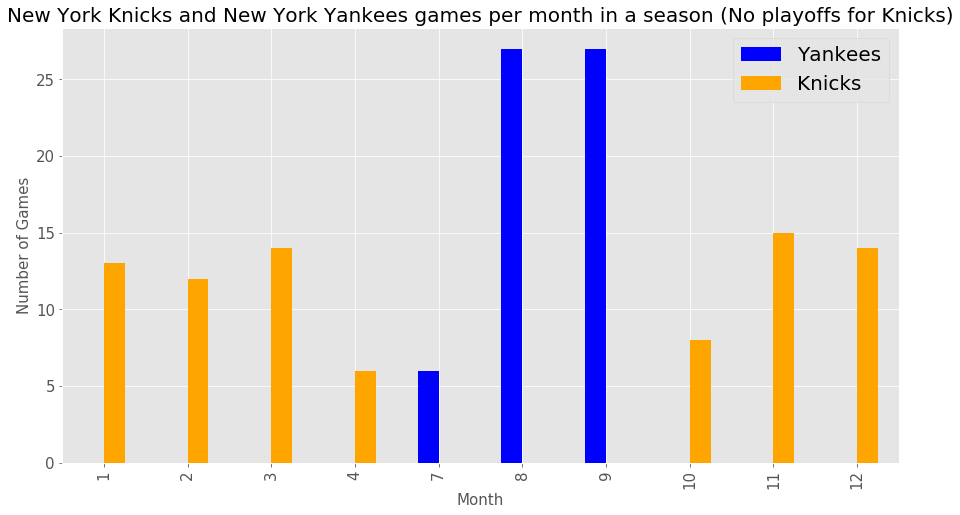

In [655]:
fig=month_games.plot(y=['G','Game'],kind='bar',color=['blue','orange'],figsize=(15,8))
plt.xlabel('Month',fontsize=15) # add to x-label to the plot
plt.ylabel('Number of Games',fontsize=15) # add y-label to the plot
plt.title('New York Knicks and New York Yankees games per month in a season (No playoffs for Knicks)',fontsize=20)
plt.legend(['Yankees','Knicks'],fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

## Since Yankes are playing only for 3 months in a year, and Knicks for 7-8 (depending if they enter playoffs) is better if the new bar is in Manhattan instead of Queens

# We continue now with Brooklyn analysis

In [679]:
filtered_columns = ['Neighborhood', 'Venue','Venue Category','Venue Latitude','Venue Longitude'] # + [col for col in manhattan_bronx_bars.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = brooklyn_bars.loc[:, filtered_columns]
dataframe_filtered1.head()

Neighborhood                                     Venue  \
0    Bay Ridge  RED OAK Restaurant & Bar & Hookah Lounge   
1    Bay Ridge                        Cebu' Bar & Bistro   
2    Bay Ridge        Zitelli's Thin Crust Pizza and Bar   
3    Bay Ridge                         Harp Bar Brooklyn   
4    Bay Ridge               Fillie's Restaurant and Bar   

                                      Venue Category  Venue Latitude  \
0  [{'id': '4bf58dd8d48988d119941735', 'name': 'H...       40.625447   
1  [{'id': '4bf58dd8d48988d157941735', 'name': 'N...       40.621812   
2  [{'id': '4bf58dd8d48988d110941735', 'name': 'I...       40.623555   
3  [{'id': '4bf58dd8d48988d116941735', 'name': 'B...       40.629789   
4  [{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...       40.625156   

   Venue Longitude  
0       -74.030246  
1       -74.031727  
2       -74.030969  
3       -74.028533  
4       -74.030661

In [680]:
filtered_columns = ['Neighborhood', 'Venue','Venue Category','Venue Latitude','Venue Longitude'] # + [col for col in manhattan_bronx_bars.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = brooklyn_bars.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['Venue Category']
    except:
        categories_list = row['venue.plural name']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered1['Venue Category'] = dataframe_filtered1.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]

brooklyn_bars_filtered=dataframe_filtered1
brooklyn_bars_filtered.head()

Neighborhood                                     Venue  \
0    Bay Ridge  RED OAK Restaurant & Bar & Hookah Lounge   
1    Bay Ridge                        Cebu' Bar & Bistro   
2    Bay Ridge        Zitelli's Thin Crust Pizza and Bar   
3    Bay Ridge                         Harp Bar Brooklyn   
4    Bay Ridge               Fillie's Restaurant and Bar   

            Venue Category  Venue Latitude  Venue Longitude  
0               Hookah Bar       40.625447       -74.030246  
1  New American Restaurant       40.621812       -74.031727  
2       Italian Restaurant       40.623555       -74.030969  
3                      Bar       40.629789       -74.028533  
4               Restaurant       40.625156       -74.030661

In [683]:
dd=brooklyn_bars_filtered.groupby('Venue Category').count()
dd.sort_values(by='Neighborhood',ascending=False).head(20)

Neighborhood  Venue  Venue Latitude  Venue Longitude
Venue Category                                                            
Salon / Barbershop             388    388             388              388
Bar                            176    176             176              176
Wine Bar                        32     32              32               32
Juice Bar                       31     31              31               31
Food                            30     30              30               30
Cocktail Bar                    26     26              26               26
Lounge                          25     25              25               25
Building                        25     25              25               25
Cosmetics Shop                  20     20              20               20
Coffee Shop                     19     19              19               19
Pizza Place                     18     18              18               18
Dive Bar                        18     18              18               18
Restaurant                      17     17              17               17
Italian Restaurant              17     17              17               17
Sports Bar                      17     17              17               17
Mexican Restaurant              16     16              16               16
Miscellaneous Shop              13     13              13               13
American Restaurant             13     13              13               13
Caribbean Restaurant            13     13              13               13
Gym / Fitness Center            13     13              13               13

In [684]:
Brooklyn_Bar_Final=pd.DataFrame(brooklyn_bars_filtered[(brooklyn_bars_filtered['Venue Category']=='Bar') |(brooklyn_bars_filtered['Venue Category']=='Cocktail Bar') | (brooklyn_bars_filtered['Venue Category']=='Juice Bar') |(brooklyn_bars_filtered['Venue Category']=='Wine Bar') |(brooklyn_bars_filtered['Venue Category']=='Hotel Bar') |(brooklyn_bars_filtered['Venue Category']=='Lounge') |(brooklyn_bars_filtered['Venue Category']=='Dive Bar') |(brooklyn_bars_filtered['Venue Category']=='Pub') |(brooklyn_bars_filtered['Venue Category']=='Sports Bar') |(brooklyn_bars_filtered['Venue Category']=='Gay Bar') |(brooklyn_bars_filtered['Venue Category']=='Karaoke Bar') | (brooklyn_bars_filtered['Venue Category']=='Gastropub') |(brooklyn_bars_filtered['Venue Category']=='Hookah Bar') |(brooklyn_bars_filtered['Venue Category']=='Sake Bar') |(brooklyn_bars_filtered['Venue Category']=='Beer Bar') |(brooklyn_bars_filtered['Venue Category']=='Beer Garden') |(brooklyn_bars_filtered['Venue Category']=='Whiskey Bar') ]).reset_index(drop=True)

## In the next map are all the venues in Brooklyn with the category bar

In [689]:
# create map of New York using latitude and longitude values
map_venues_brooklyn = folium.Map(location=[latitude_manh, longitude_manh], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(Brooklyn_Bar_Final['Venue Latitude'], Brooklyn_Bar_Final['Venue Longitude'], Brooklyn_Bar_Final['Neighborhood']):
    label = '{}'.format(neighborhood) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues_brooklyn)
    
    
map_venues_brooklyn

In [690]:
Brooklyn_SportsBar=dataframe_filtered1[(dataframe_filtered1['Venue Category']=='Sports Bar')].reset_index(drop=True)
Brooklyn_SportsBar.head(10)

Neighborhood                                              Venue  \
0      Sunset Park                     Winners Circle Cafe Sports Bar   
1       Greenpoint                                    Lake Street Bar   
2       Greenpoint                                        Red Star NY   
3    East Flatbush                  The SandHills Sports Bar & Lounge   
4     Williamsburg                              Eddie JR's Sports Bar   
5  Carroll Gardens  New York Sports Bar, Terminal B, LaGuardia Air...   
6          Gowanus  New York Sports Bar, Terminal B, LaGuardia Air...   
7       Bath Beach                   TequilaVille Mexican Bar & Grill   
8       Ocean Hill                               Zona Viva Sports Bar   
9          Midwood                                  Jack's Sports Bar   

  Venue Category  Venue Latitude  Venue Longitude  
0     Sports Bar       40.639652       -74.005592  
1     Sports Bar       40.725646       -73.951820  
2     Sports Bar       40.729734       -73.958923  
3     Sports Bar       40.637203       -73.934959  
4     Sports Bar       40.712948       -73.955081  
5     Sports Bar       40.676990       -73.998180  
6     Sports Bar       40.676990       -73.998180  
7     Sports Bar       40.599518       -73.999237  
8     Sports Bar       40.684960       -73.914015  
9     Sports Bar       40.624596       -73.965240

In [691]:
Brooklyn_SportsBar.shape

(17, 5)

## We can see in the map below with orange color are venues with the category bar and with red are the Sports Bars

In [692]:
# create map of New York using latitude and longitude values
map_venues_brooklyn = folium.Map(location=[latitude_manh, longitude_manh], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(Brooklyn_Bar_Final['Venue Latitude'], Brooklyn_Bar_Final['Venue Longitude'], Brooklyn_Bar_Final['Neighborhood']):
    label = '{}'.format(neighborhood) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues_brooklyn)
    
for lat, lng, neighborhood in zip(Brooklyn_SportsBar['Venue Latitude'], Brooklyn_SportsBar['Venue Longitude'], Brooklyn_SportsBar['Neighborhood']):
    label = '{}'.format(neighborhood) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues_brooklyn)  
    
    
map_venues_brooklyn

## Now we have to compare/CLUSTER the neighborhoods of Brooklyn with Queens
## We have already a bar in Queens which is succesfull and we want the second bar in Brooklyn to be in a similar neighborhood

In [741]:
Brook_Queens_concat=pd.concat([Brooklyn_Bar_Final, queens_bars_final], ignore_index=True)
Brook_Queens_concat.head()

Neighborhood                                     Venue Venue Category  \
0    Bay Ridge  RED OAK Restaurant & Bar & Hookah Lounge     Hookah Bar   
1    Bay Ridge                         Harp Bar Brooklyn            Bar   
2    Bay Ridge             Gallery Social Bar and Lounge   Cocktail Bar   
3    Bay Ridge                        RJ's bar bay ridge            Bar   
4    Bay Ridge                 Harvest Grill & Juice Bar      Juice Bar   

   Venue Latitude  Venue Longitude Borough  
0       40.625447       -74.030246     NaN  
1       40.629789       -74.028533     NaN  
2       40.628048       -74.028854     NaN  
3       40.622320       -74.028010     NaN  
4       40.622009       -74.025269     NaN

### Get dummies

In [742]:
# one hot encoding
Brook_Queens_concat_onehot = pd.get_dummies(Brook_Queens_concat[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Brook_Queens_concat_onehot['Neighborhood'] = Brook_Queens_concat['Neighborhood'] 

# move neighborhood column to the first column
cols = list(Brook_Queens_concat_onehot.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Neighborhood')) #Remove columns from list
Brook_Queens_concat_onehot = Brook_Queens_concat_onehot[['Neighborhood']+cols] #Create new dataframe with columns in the order you want
Brook_Queens_concat_onehot.head()

pd.set_option('display.max_columns', 225)
Brook_Queens_concat_onehot.head()

Neighborhood  Bar  Beer Bar  Beer Garden  Cocktail Bar  Dive Bar  Gastropub  \
0    Bay Ridge    0         0            0             0         0          0   
1    Bay Ridge    1         0            0             0         0          0   
2    Bay Ridge    0         0            0             1         0          0   
3    Bay Ridge    1         0            0             0         0          0   
4    Bay Ridge    0         0            0             0         0          0   

   Gay Bar  Hookah Bar  Hotel Bar  Juice Bar  Karaoke Bar  Lounge  Pub  \
0        0           1          0          0            0       0    0   
1        0           0          0          0            0       0    0   
2        0           0          0          0            0       0    0   
3        0           0          0          0            0       0    0   
4        0           0          0          1            0       0    0   

   Sports Bar  Wine Bar  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0

In [743]:
Brook_Queens_concat_grouped= Brook_Queens_concat_onehot.groupby('Neighborhood').mean().reset_index()
Brook_Queens_concat_grouped.head(15)

Neighborhood       Bar  Beer Bar  Beer Garden  Cocktail Bar  \
0              Astoria  0.411765       0.0          0.0      0.000000   
1      Astoria Heights  0.000000       0.0          0.0      0.000000   
2           Auburndale  1.000000       0.0          0.0      0.000000   
3           Bath Beach  0.000000       0.0          0.0      0.000000   
4            Bay Ridge  0.545455       0.0          0.0      0.090909   
5              Bayside  0.666667       0.0          0.0      0.000000   
6   Bedford Stuyvesant  0.500000       0.0          0.0      0.000000   
7             Bellaire  0.500000       0.0          0.0      0.000000   
8         Belle Harbor  1.000000       0.0          0.0      0.000000   
9          Bensonhurst  0.000000       0.0          0.0      0.000000   
10         Boerum Hill  0.600000       0.0          0.0      0.000000   
11        Borough Park  0.000000       0.0          0.0      0.000000   
12           Briarwood  0.500000       0.0          0.0      0.000000   
13       Broad Channel  0.500000       0.0          0.0      0.000000   
14   Broadway Junction  0.500000       0.0          0.0      0.000000   

    Dive Bar  Gastropub  Gay Bar  Hookah Bar  Hotel Bar  Juice Bar  \
0   0.117647        0.0      0.0    0.117647        0.0   0.117647   
1   0.000000        0.0      0.0    0.000000        1.0   0.000000   
2   0.000000        0.0      0.0    0.000000        0.0   0.000000   
3   0.000000        0.0      0.0    0.333333        0.0   0.000000   
4   0.000000        0.0      0.0    0.090909        0.0   0.181818   
5   0.000000        0.0      0.0    0.333333        0.0   0.000000   
6   0.000000        0.0      0.0    0.000000        0.0   0.000000   
7   0.000000        0.0      0.0    0.000000        0.0   0.000000   
8   0.000000        0.0      0.0    0.000000        0.0   0.000000   
9   0.000000        0.0      0.0    0.000000        0.0   0.000000   
10  0.000000        0.0      0.0    0.000000        0.1   0.100000   
11  0.000000        0.0      0.0    0.000000        0.0   0.000000   
12  0.000000        0.0      0.0    0.000000        0.0   0.000000   
13  0.500000        0.0      0.0    0.000000        0.0   0.000000   
14  0.000000        0.0      0.0    0.000000        0.0   0.000000   

    Karaoke Bar    Lounge       Pub  Sports Bar  Wine Bar  
0      0.000000  0.058824  0.058824    0.117647  0.000000  
1      0.000000  0.000000  0.000000    0.000000  0.000000  
2      0.000000  0.000000  0.000000    0.000000  0.000000  
3      0.333333  0.000000  0.000000    0.333333  0.000000  
4      0.000000  0.000000  0.000000    0.000000  0.090909  
5      0.000000  0.000000  0.000000    0.000000  0.000000  
6      0.000000  0.000000  0.500000    0.000000  0.000000  
7      0.000000  0.000000  0.000000    0.500000  0.000000  
8      0.000000  0.000000  0.000000    0.000000  0.000000  
9      0.000000  0.000000  0.000000    0.000000  1.000000  
10     0.000000  0.000000  0.000000    0.000000  0.200000  
11     0.000000  1.000000  0.000000    0.000000  0.000000  
12     0.000000  0.500000  0.000000    0.000000  0.000000  
13     0.000000  0.000000  0.000000    0.000000  0.000000  
14     0.000000  0.250000  0.000000    0.250000  0.000000

# Clustering the Neighborhoods

In [814]:
from sklearn.cluster import KMeans

In [815]:
# set number of clusters
kclusters = 5

Brook_Queens_clustering = Brook_Queens_concat_grouped.drop('Neighborhood', 1) #axis nomizw to 1
Brook_Queens_clustering
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0)
kmeans.fit(Brook_Queens_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:130] 

array([0, 4, 2, 4, 0, 2, 0, 0, 2, 4, 0, 3, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0,
       0, 2, 2, 1, 2, 3, 2, 0, 1, 4, 4, 2, 0, 0, 2, 2, 3, 0, 3, 0, 0, 4,
       0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 4, 0, 3,
       2, 3, 0, 2, 2, 3, 2, 2, 0, 4, 4, 4, 2, 2, 2, 0, 0, 2, 3, 1, 1, 3,
       0, 2, 0, 2, 1, 2, 2, 4, 3, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 4, 0, 4, 2, 0, 2, 2, 2, 2])

In [816]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
brook_queens_sorted = pd.DataFrame(columns=columns)
brook_queens_sorted['Neighborhood'] = Brook_Queens_concat_grouped['Neighborhood']

for ind in np.arange(Brook_Queens_concat_grouped.shape[0]):
    brook_queens_sorted.iloc[ind, 1:] = return_most_common_venues(Brook_Queens_concat_grouped.iloc[ind, :], num_top_venues)

brook_queens_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0          Astoria                   Bar            Sports Bar   
1  Astoria Heights             Hotel Bar              Wine Bar   
2       Auburndale                   Bar              Wine Bar   
3       Bath Beach            Sports Bar           Karaoke Bar   
4        Bay Ridge                   Bar             Juice Bar   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0             Juice Bar            Hookah Bar              Dive Bar   
1            Sports Bar                   Pub                Lounge   
2            Sports Bar                   Pub                Lounge   
3            Hookah Bar              Wine Bar                   Pub   
4              Wine Bar            Hookah Bar          Cocktail Bar   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   Pub                Lounge              Wine Bar   
1           Karaoke Bar             Juice Bar            Hookah Bar   
2           Karaoke Bar             Juice Bar             Hotel Bar   
3                Lounge             Juice Bar             Hotel Bar   
4            Sports Bar                   Pub                Lounge   

  9th Most Common Venue 10th Most Common Venue  
0           Karaoke Bar              Hotel Bar  
1               Gay Bar              Gastropub  
2            Hookah Bar                Gay Bar  
3               Gay Bar              Gastropub  
4           Karaoke Bar              Hotel Bar

In [817]:
brook_queens1 = Area_df[(Area_df['Borough']=='Brooklyn') | (Area_df['Borough']=='Queens')].reset_index(drop=True)
brook_queens1.head()

Borough Neighborhood   Latitude  Longitude
0  Brooklyn    Bay Ridge  40.625801 -74.030621
1  Brooklyn  Bensonhurst  40.611009 -73.995180
2  Brooklyn  Sunset Park  40.645103 -74.010316
3  Brooklyn   Greenpoint  40.730201 -73.954241
4  Brooklyn    Gravesend  40.595260 -73.973471

In [818]:
brook_queens_sorted.shape

(120, 11)

In [819]:
# add clustering labels
brook_queens_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brook_queens_clust=brook_queens1


# # merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
brook_queens_clust = brook_queens_clust.join(brook_queens_sorted.set_index('Neighborhood'), on='Neighborhood')

brook_queens_clust.head() # check the last columns!

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Brooklyn    Bay Ridge  40.625801 -74.030621             0.0   
1  Brooklyn  Bensonhurst  40.611009 -73.995180             4.0   
2  Brooklyn  Sunset Park  40.645103 -74.010316             4.0   
3  Brooklyn   Greenpoint  40.730201 -73.954241             0.0   
4  Brooklyn    Gravesend  40.595260 -73.973471             0.0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   Bar             Juice Bar              Wine Bar   
1              Wine Bar            Sports Bar                   Pub   
2            Sports Bar              Dive Bar          Cocktail Bar   
3                   Bar            Sports Bar              Wine Bar   
4                   Bar                Lounge            Hookah Bar   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0            Hookah Bar          Cocktail Bar            Sports Bar   
1                Lounge           Karaoke Bar             Juice Bar   
2              Wine Bar                   Pub                Lounge   
3          Cocktail Bar                   Pub                Lounge   
4              Wine Bar            Sports Bar                   Pub   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                   Pub                Lounge           Karaoke Bar   
1             Hotel Bar            Hookah Bar               Gay Bar   
2           Karaoke Bar             Juice Bar             Hotel Bar   
3           Karaoke Bar             Juice Bar             Hotel Bar   
4           Karaoke Bar             Juice Bar             Hotel Bar   

  10th Most Common Venue  
0              Hotel Bar  
1              Gastropub  
2             Hookah Bar  
3             Hookah Bar  
4                Gay Bar

In [820]:
brook_queens_clust.dropna(inplace=True) #default axis=0 diladi fevgei rows
brook_queens_clust['Cluster Labels']=brook_queens_clust['Cluster Labels'].astype(int)
brook_queens_clust

Borough               Neighborhood   Latitude  Longitude  \
0    Brooklyn                  Bay Ridge  40.625801 -74.030621   
1    Brooklyn                Bensonhurst  40.611009 -73.995180   
2    Brooklyn                Sunset Park  40.645103 -74.010316   
3    Brooklyn                 Greenpoint  40.730201 -73.954241   
4    Brooklyn                  Gravesend  40.595260 -73.973471   
6    Brooklyn             Sheepshead Bay  40.586890 -73.943186   
7    Brooklyn          Manhattan Terrace  40.614433 -73.957438   
8    Brooklyn                   Flatbush  40.636326 -73.958401   
9    Brooklyn              Crown Heights  40.670829 -73.943291   
10   Brooklyn              East Flatbush  40.641718 -73.936103   
11   Brooklyn                 Kensington  40.642382 -73.980421   
12   Brooklyn            Windsor Terrace  40.656946 -73.980073   
13   Brooklyn           Prospect Heights  40.676822 -73.964859   
15   Brooklyn               Williamsburg  40.707144 -73.958115   
16   Brooklyn                   Bushwick  40.698116 -73.925258   
17   Brooklyn         Bedford Stuyvesant  40.687232 -73.941785   
18   Brooklyn           Brooklyn Heights  40.695864 -73.993782   
19   Brooklyn                Cobble Hill  40.687920 -73.998561   
20   Brooklyn            Carroll Gardens  40.680540 -73.994654   
21   Brooklyn                   Red Hook  40.676253 -74.012759   
22   Brooklyn                    Gowanus  40.673931 -73.994441   
23   Brooklyn                Fort Greene  40.688527 -73.972906   
24   Brooklyn                 Park Slope  40.672321 -73.977050   
26   Brooklyn              East New York  40.669926 -73.880699   
28   Brooklyn                   Canarsie  40.635564 -73.902093   
29   Brooklyn                  Flatlands  40.630446 -73.929113   
31   Brooklyn            Manhattan Beach  40.577914 -73.943537   
32   Brooklyn               Coney Island  40.574293 -73.988683   
33   Brooklyn                 Bath Beach  40.599519 -73.998752   
34   Brooklyn               Borough Park  40.633131 -73.990498   
35   Brooklyn              Dyker Heights  40.619219 -74.019314   
36   Brooklyn            Gerritsen Beach  40.590848 -73.930102   
37   Brooklyn                Marine Park  40.609748 -73.931344   
38   Brooklyn               Clinton Hill  40.693229 -73.967843   
40   Brooklyn                   Downtown  40.690844 -73.983463   
41   Brooklyn                Boerum Hill  40.685683 -73.983748   
42   Brooklyn  Prospect Lefferts Gardens  40.658420 -73.954899   
43   Brooklyn                 Ocean Hill  40.678403 -73.913068   
46   Brooklyn                    Midwood  40.625596 -73.957595   
47   Brooklyn        Prospect Park South  40.647009 -73.962613   
48   Brooklyn                 Georgetown  40.623845 -73.916075   
49   Brooklyn          East Williamsburg  40.708492 -73.938858   
50   Brooklyn                 North Side  40.714823 -73.958809   
51   Brooklyn                 South Side  40.710861 -73.958001   
52   Brooklyn              Ocean Parkway  40.613060 -73.968367   
53   Brooklyn              Fort Hamilton  40.614768 -74.031979   
54     Queens                    Astoria  40.768509 -73.915654   
55     Queens                   Woodside  40.746349 -73.901842   
56     Queens            Jackson Heights  40.751981 -73.882821   
57     Queens                   Elmhurst  40.744049 -73.881656   
58     Queens               Howard Beach  40.654225 -73.838138   
60     Queens               Forest Hills  40.725264 -73.844475   
61     Queens                Kew Gardens  40.705179 -73.829819   
62     Queens              Richmond Hill  40.697947 -73.831833   
63     Queens                   Flushing  40.764454 -73.831773   
64     Queens           Long Island City  40.750217 -73.939202   
65     Queens                  Sunnyside  40.740176 -73.926916   
66     Queens              East Elmhurst  40.764073 -73.867041   
67     Queens                    Maspeth  40.725427 -73.896217   
68     Queens                  Ridgewood  40.7

## Map with Clusters

In [831]:
map_clusters1 = folium.Map(location=[latitude_manh, longitude_manh], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brook_queens_clust['Latitude'], brook_queens_clust['Longitude'], brook_queens_clust['Neighborhood'], brook_queens_clust['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)
    
folium.CircleMarker(
        [40.745, -73.9005],
        radius=12,
        color ='black',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7).add_to(map_clusters1)
       
map_clusters1

## As mentioned before the existing bar in Queens is the black circle marker. Which means here is in a neighborhood with cluster 1 and color lightblue

In [832]:
brook_queens_clust.groupby('Cluster Labels').count()

Borough  Neighborhood  Latitude  Longitude  \
Cluster Labels                                               
0                    44            44        44         44   
1                    11            11        11         11   
2                    41            41        41         41   
3                    11            11        11         11   
4                    13            13        13         13   

                1st Most Common Venue  2nd Most Common Venue  \
Cluster Labels                                                 
0                                  44                     44   
1                                  11                     11   
2                                  41                     41   
3                                  11                     11   
4                                  13                     13   

                3rd Most Common Venue  4th Most Common Venue  \
Cluster Labels                                                 
0                                  44                     44   
1                                  11                     11   
2                                  41                     41   
3                                  11                     11   
4                                  13                     13   

                5th Most Common Venue  6th Most Common Venue  \
Cluster Labels                                                 
0                                  44                     44   
1                                  11                     11   
2                                  41                     41   
3                                  11                     11   
4                                  13                     13   

                7th Most Common Venue  8th Most Common Venue  \
Cluster Labels                                                 
0                                  44                     44   
1                                  11                     11   
2                                  41                     41   
3                                  11                     11   
4                                  13                     13   

                9th Most Common Venue  10th Most Common Venue  
Cluster Labels                                                 
0                                  44                      44  
1                                  11                      11  
2                                  41                      41  
3                                  11                      11  
4                                  13                      13

# Let's visualize the neigborhoods with cluster 1 in Brooklyn (LIGHT BLUE) alongside the existing Sports Bars close (RED)

In [836]:
brooklyn_bars_cluster1=brook_queens_clust[(brook_queens_clust['Borough']=='Brooklyn') & (brook_queens_clust['Cluster Labels']==2)]

In [837]:
brooklyn_bars_cluster1.head()

Borough       Neighborhood   Latitude  Longitude  Cluster Labels  \
7   Brooklyn  Manhattan Terrace  40.614433 -73.957438               2   
12  Brooklyn    Windsor Terrace  40.656946 -73.980073               2   
13  Brooklyn   Prospect Heights  40.676822 -73.964859               2   
26  Brooklyn      East New York  40.669926 -73.880699               2   
32  Brooklyn       Coney Island  40.574293 -73.988683               2   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
7                    Bar             Juice Bar              Wine Bar   
12                   Bar              Wine Bar            Sports Bar   
13                   Bar                Lounge             Juice Bar   
26                   Bar              Wine Bar            Sports Bar   
32                   Bar              Wine Bar            Sports Bar   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
7             Sports Bar                   Pub                Lounge   
12                   Pub                Lounge           Karaoke Bar   
13              Dive Bar              Wine Bar            Sports Bar   
26                   Pub                Lounge           Karaoke Bar   
32                   Pub                Lounge           Karaoke Bar   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
7            Karaoke Bar             Hotel Bar            Hookah Bar   
12             Juice Bar             Hotel Bar            Hookah Bar   
13                   Pub           Karaoke Bar             Hotel Bar   
26             Juice Bar             Hotel Bar            Hookah Bar   
32             Juice Bar             Hotel Bar            Hookah Bar   

   10th Most Common Venue  
7                 Gay Bar  
12                Gay Bar  
13             Hookah Bar  
26                Gay Bar  
32                Gay Bar

In [846]:
new_bar2 = folium.Map(location=[latitude_manh, longitude_manh], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(brooklyn_bars_cluster1['Latitude'], brooklyn_bars_cluster1['Longitude'], brooklyn_bars_cluster1['Neighborhood']):
    label = '{}'.format(neighborhood) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='dodgerblue',
        fill=True,
        fill_color='dodgerblue',
        fill_opacity=0.7,
        parse_html=False).add_to(new_bar2)

for lat, lng, neighborhood in zip(Brooklyn_SportsBar['Venue Latitude'], Brooklyn_SportsBar['Venue Longitude'], Brooklyn_SportsBar['Neighborhood']):
    label = '{}'.format(neighborhood) #opos to print pio panw me to .format
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(new_bar2)  
    
#The location of the existing bar    
folium.CircleMarker(
        [40.745, -73.9005],
        radius=12,
        color ='black',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7).add_to(new_bar2)
    
new_bar2

## Light Blue are potential good locations and red are existing sports bar

# Let's add Brooklyn Nets games

In [660]:
Nets=pd.read_csv(r'C:\Users\dee\Documents\Python\Data Science Labs\Capstone Project\Nets schedule.csv')
Nets.head()

G       Date        Day
0  1 2018-10-17  Wednesday
1  2 2018-10-19     Friday
2  3 2018-10-20   Saturday
3  4 2018-10-24  Wednesday
4  5 2018-10-26     Friday

In [614]:
Nets=Nets[['G','Date']]

In [661]:
Nets.head()

G       Date        Day
0  1 2018-10-17  Wednesday
1  2 2018-10-19     Friday
2  3 2018-10-20   Saturday
3  4 2018-10-24  Wednesday
4  5 2018-10-26     Friday

In [616]:
Nets['Date'] = pd.to_datetime(Nets['Date'], format='%a, %b %d, %Y')

<ipython-input-616-0d1ed975185d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nets['Date'] = pd.to_datetime(Nets['Date'], format='%a, %b %d, %Y')


In [618]:
Nets['Day'] = Nets['Date'].dt.dayofweek

<ipython-input-618-b66f85be49a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nets['Day'] = Nets['Date'].dt.dayofweek


In [619]:
Nets['Day'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)

c:\users\dee\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [620]:
Nets_days=Nets.groupby('Day').count()
Nets_days

G  Date
Day                
Friday     18    18
Monday     14    14
Saturday   13    13
Sunday      8     8
Thursday    3     3
Tuesday     5     5
Wednesday  21    21

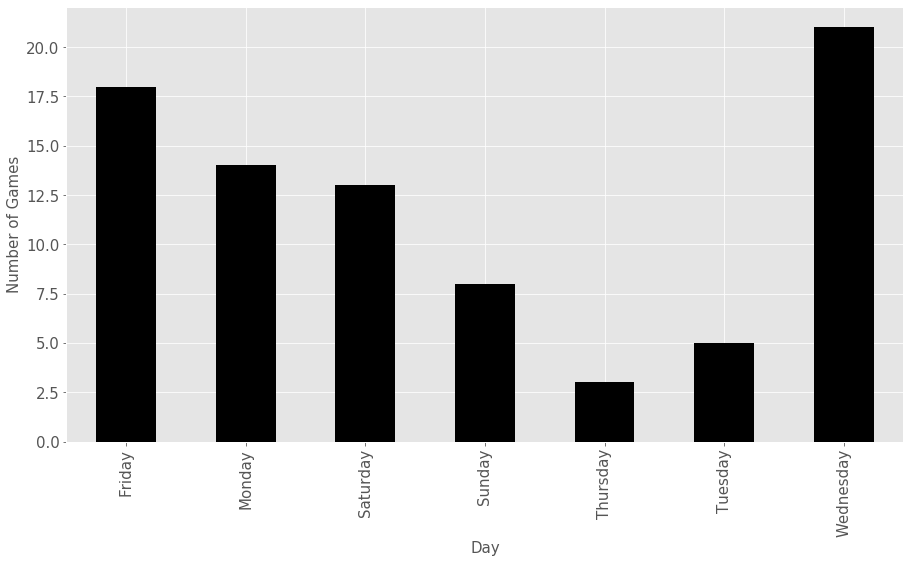

In [628]:
fig=Nets_days['G'].plot(kind='bar',color='black',figsize=(15,8))
plt.xlabel('Day',fontsize=15) # add to x-label to the plot
plt.ylabel('Number of Games',fontsize=15) # add y-label to the plot
plt.tick_params(axis='both', which='major', labelsize=15)

## From the above graph we can say that we expect more Brooklyn fans to come to the bar on Wednesday so is good to have more staff. Also it seems that in Tuesday and Thursday we don' t expect Brooklyn Nets fans